KAGGLE COMP 2: HOUSE PRICES

- Let's try MLR, LR + others + XGB

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#EDA

In [ ]:
data_train = pd.read_csv('train.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data_train.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   
2     Attchd       2001.0          RFn           2         608         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   
2            0         0    NaN   NaN         NaN        0       9    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500  
2       WD        Normal     223500

In [ ]:
data_train.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
pd.options.display.min_rows = 90

In [ ]:
data_train.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [ ]:
data_train['LotFrontage'].isnull().sum()/data_train.shape[0]   #we will remove this columns as it makes up a 18% of our training set

0.1773972602739726

In [ ]:
data_train['GarageYrBlt'].isnull().sum()/data_train.shape[0]     #we will initially deal with these GARAGE nans as I believe these features may be of interest

0.05547945205479452

In [ ]:
data_train2= data_train.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)

In [ ]:
data_train2.head(2)

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         548         TA         TA          Y   
1          RFn           2         460         TA         TA          Y   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   

   MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0        0       2    2008       WD        Normal     208500  
1        0       5    2007       WD        Normal     181500

In [ ]:
data_train2.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
                 ..
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
GarageQual       81
GarageCond       81
PavedDrive        0
WoodDeckSF        0


In [ ]:
data_train2.shape[0]/81

18.02469135802469

In [ ]:
#also let's drop some variables that seems to be not relevant or are pretty difficult to work with

In [ ]:
data_train2= data_train2.drop(['Neighborhood','MSZoning','LandContour','LotConfig','Condition1','Condition2','BldgType','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtFinSF2','Heating','Electrical','Functional','SaleType','SaleCondition'], axis=1)

In [ ]:
data_train2.head()

Id  MSSubClass  LotArea Street LotShape Utilities LandSlope HouseStyle  \
0   1          60     8450   Pave      Reg    AllPub       Gtl     2Story   
1   2          20     9600   Pave      Reg    AllPub       Gtl     1Story   
2   3          60    11250   Pave      IR1    AllPub       Gtl     2Story   
3   4          70     9550   Pave      IR1    AllPub       Gtl     2Story   
4   5          60    14260   Pave      IR1    AllPub       Gtl     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea ExterQual  \
0            7            5       2003          2003       196.0        Gd   
1            6            8       1976          1976         0.0        TA   
2            7            5       2001          2002       162.0        Gd   
3            7            5       1915          1970         0.0        TA   
4            8            5       2000          2000       350.0        Gd   

  ExterCond BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        TA       Gd       TA           No          GLQ         706   
1        TA       Gd       TA           Gd          ALQ         978   
2        TA       Gd       TA           Mn          GLQ         486   
3        TA       TA       Gd           No          ALQ         216   
4        TA       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir  1stFlrSF  \
0          Unf        150          856        Ex          Y       856   
1          Unf        284         1262        Ex          Y      1262   
2          Unf        434          920        Ex          Y       920   
3          Unf        540          756        Gd          Y       961   
4          Unf        490         1145        Ex          Y      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces  \
0         1             3             1          Gd             8           0   
1         0             3             1          TA             6           1   
2         1             3             1          Gd             6           1   
3         0             3             1          Gd             7           1   
4         1             4             1          Gd             9           1   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   
2     Attchd       2001.0          RFn           2         608         TA   
3     Detchd       1998.0          Unf           3         642         TA   
4     Attchd       2000.0          RFn           3         836         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   
3         TA          Y           0           35            272          0   
4         TA          Y         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0            0         0        0       2    2008     208500  
1            0         0        0       5    2007     181500  
2            0         0        0       9    2008     223500  
3            0         0        0       2    2006     140000  
4 

In [ ]:
#next is mapping nominal features, calculated pearsons corr, and drop any other feature as per the correlations before going on

In [ ]:
data_train2.shape

(1460, 56)

In [ ]:
data_train2['Street']= data_train2['Street'].map({'Pave':1,'Grvl':0})

In [ ]:
data_train2['LotShape'] = data_train2['LotShape'].map({'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0})

In [ ]:
data_train2['Utilities'] = data_train2['Utilities'].map({'AllPub':1, 'NoSeWa':0})

In [ ]:
data_train2['LandSlope'] = data_train2['LandSlope'].map({'Gtl':2, 'Mod':1, 'Sev':0})

In [ ]:
data_train2['HouseStyle'] = data_train2['HouseStyle'].map({'2.5Fin':7,'2.5Unf':6,'2Story':5, '1Story':4, '1.5Fin':3, '1.5Unf':2, 'SFoyer':1, 'SLvl':0 })

In [ ]:
data_train2['ExterQual'] = data_train2['ExterQual'].map({'Gd':2, 'TA':1, 'Ex':3, 'Fa':0})

In [ ]:
data_train2['ExterCond'] = data_train2['ExterCond'].map({'Gd':3, 'TA':2, 'Ex':4, 'Fa':1, 'Po':0})

In [ ]:
data_train2['BsmtQual'].unique()   #nan values on here we will take care of them
data_train2['BsmtQual'] = data_train2['BsmtQual'].map({'Gd':2, 'TA':1, 'Ex':3, 'Fa':0}) #mapping existing categories
data_train2['BsmtQual']= pd.to_numeric(data_train2['BsmtQual'])   #converting object to integer
data_train2['BsmtQual'] = data_train2['BsmtQual'].fillna(data_train2['BsmtQual'].mean())   #nulls as average of the rest
data_train2['BsmtQual'].unique()   #done!


array([2.        , 1.        , 3.        , 1.57976107, 0.        ])

In [ ]:
data_train2['BsmtCond'] = data_train2['BsmtCond'].map({'TA':2, 'Gd':3, 'Fa':1, 'Po':0}) #mapping existing categories
data_train2['BsmtCond']= pd.to_numeric(data_train2['BsmtCond'])   #converting object to integer
data_train2['BsmtCond'] = data_train2['BsmtCond'].fillna(data_train2['BsmtCond'].mean())   #nulls as average of the rest
data_train2['BsmtCond'].unique()   #done!



array([2.        , 3.        , 2.01124385, 1.        , 0.        ])

In [ ]:
data_train2['BsmtExposure'] = data_train2['BsmtExposure'].map({'No':0, 'Gd':3, 'Mn':1, 'Av':2}) #mapping existing categories
data_train2['BsmtExposure']= pd.to_numeric(data_train2['BsmtExposure'])   #converting object to integer
data_train2['BsmtExposure'] = data_train2['BsmtExposure'].fillna(data_train2['BsmtExposure'].mean())   #nulls as average of the rest
data_train2['BsmtExposure'].unique()   #done!


array([0.        , 3.        , 1.        , 2.        , 0.67369902])

In [ ]:
data_train2['BsmtFinType1'] = data_train2['BsmtFinType1'].map({'GLQ':5, 'ALQ':4, 'Unf':0, 'Rec':2, 'BLQ':3, 'LwQ':1}) #mapping existing categories
data_train2['BsmtFinType1']= pd.to_numeric(data_train2['BsmtFinType1'])   #converting object to integer
data_train2['BsmtFinType1'] = data_train2['BsmtFinType1'].fillna(data_train2['BsmtFinType1'].mean())   #nulls as average of the rest
data_train2['BsmtFinType1'].unique()   #done!

array([5.        , 4.        , 0.        , 2.        , 3.        ,
       2.63808855, 1.        ])

In [ ]:
data_train2['BsmtFinType2'] = data_train2['BsmtFinType2'].map({'GLQ':5, 'ALQ':4, 'Unf':0, 'Rec':2, 'BLQ':3, 'LwQ':1}) #mapping existing categories
data_train2['BsmtFinType2']= pd.to_numeric(data_train2['BsmtFinType2'])   #converting object to integer
data_train2['BsmtFinType2'] = data_train2['BsmtFinType2'].fillna(data_train2['BsmtFinType2'].mean())   #nulls as average of the rest
data_train2['BsmtFinType2'].unique()   #done!


array([0.        , 3.        , 0.28059072, 4.        , 2.        ,
       1.        , 5.        ])

In [ ]:
data_train2['HeatingQC'] = data_train2['HeatingQC'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})

In [ ]:
data_train2['HeatingQC'] = data_train2['HeatingQC'].map({'Y':1, 'N':0})

In [ ]:
data_train2['KitchenQual'] = data_train2['KitchenQual'].map({'Gd':2, 'TA':1, 'Ex':3, 'Fa':0})

In [ ]:
data_train2['GarageType'] = data_train2['GarageType'].map({'Attchd':4, 'Detchd':0, 'BuiltIn':2, 'CarPort':1, 'Basment':3, '2Types':5}) #mapping existing categories
data_train2['GarageType']= pd.to_numeric(data_train2['GarageType'])   #converting object to integer
data_train2['GarageType'] = data_train2['GarageType'].fillna(data_train2['GarageType'].mean())   #nulls as average of the rest
data_train2['GarageType'].unique()   #done!

array([4.        , 0.        , 2.        , 1.        , 2.72081218,
       3.        , 5.        ])

In [ ]:
data_train2['GarageFinish'] = data_train2['GarageFinish'].map({'RFn':1, 'Unf':0, 'Fin':2}) #mapping existing categories
data_train2['GarageFinish']= pd.to_numeric(data_train2['GarageFinish'])   #converting object to integer
data_train2['GarageFinish'] = data_train2['GarageFinish'].fillna(data_train2['GarageFinish'].mean())   #nulls as average of the rest
data_train2['GarageFinish'].unique()   #done!

array([1.        , 0.        , 2.        , 0.81653372])

In [ ]:
data_train2['GarageQual'] = data_train2['GarageQual'].map({'TA':2, 'Fa':1, 'Gd':3, 'Ex':4, 'Po':0}) #mapping existing categories
data_train2['GarageQual']= pd.to_numeric(data_train2['GarageQual'])   #converting object to integer
data_train2['GarageQual'] = data_train2['GarageQual'].fillna(data_train2['GarageQual'].mean())   #nulls as average of the rest
data_train2['GarageQual'].unique()   #done!

array([2.        , 1.        , 3.        , 1.97534445, 4.        ,
       0.        ])

In [ ]:
data_train2['GarageCond'] = data_train2['GarageCond'].map({'TA':2, 'Fa':1, 'Gd':3, 'Ex':4, 'Po':0}) #mapping existing categories
data_train2['GarageCond']= pd.to_numeric(data_train2['GarageCond'])   #converting object to integer
data_train2['GarageCond'] = data_train2['GarageCond'].fillna(data_train2['GarageCond'].mean())   #nulls as average of the rest
data_train2['GarageCond'].unique()   #done!

array([2.        , 1.        , 1.97389413, 3.        , 0.        ,
       4.        ])

In [ ]:
data_train2['PavedDrive'] = data_train2['PavedDrive'].map({'Y':2, 'N':0, 'P':1})

In [ ]:
data_train2.head()

Id  MSSubClass  LotArea  Street  LotShape  Utilities  LandSlope  \
0   1          60     8450       1         3          1          2   
1   2          20     9600       1         3          1          2   
2   3          60    11250       1         2          1          2   
3   4          70     9550       1         2          1          2   
4   5          60    14260       1         2          1          2   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0           5            7            5       2003          2003       196.0   
1           4            6            8       1976          1976         0.0   
2           5            7            5       2001          2002       162.0   
3           5            7            5       1915          1970         0.0   
4           5            8            5       2000          2000       350.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          2          2       2.0       2.0           0.0           5.0   
1          1          2       2.0       2.0           3.0           4.0   
2          2          2       2.0       2.0           1.0           5.0   
3          1          2       1.0       3.0           0.0           4.0   
4          2          2       2.0       2.0           2.0           5.0   

   BsmtFinSF1  BsmtFinType2  BsmtUnfSF  TotalBsmtSF  HeatingQC CentralAir  \
0         706           0.0        150          856        NaN          Y   
1         978           0.0        284         1262        NaN          Y   
2         486           0.0        434          920        NaN          Y   
3         216           0.0        540          756        NaN          Y   
4         655           0.0        490         1145        NaN          Y   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            1             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2             7   
4         2         1             4             1            2             9   

   Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0           0         4.0       2003.0           1.0           2         548   
1           1         4.0       1976.0           1.0           2         460   
2           1         4.0       2001.0           1.0           2         608   
3           1         0.0       1998.0           0.0           3         642   
4           1         4.0       2000.0           1.0           3         836   

   GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         2.0         2.0           2           0           61              0   
1         2.0         2.0           2         298            0              0   
2         2.0         2.0           2           0           42              0   
3         2.0         2.0           2           0           35            272   
4         2.0         2.0           2         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0          0            0         0        0       2    2008     208500  
1          0            0         0        0       5    2007     181500  
2          0            0         0        0   

In [ ]:
data_train2.isnull().sum()

Id                  0
MSSubClass          0
LotArea             0
Street              0
LotShape            0
Utilities           0
LandSlope           0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
ExterQual           0
ExterCond           0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC        1460
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Fireplaces          0
GarageType          0
GarageYrBlt        81
GarageFinish        0
GarageCars          0
GarageArea          0
GarageQual          0
GarageCond          0
PavedDrive

In [ ]:
#NEXT: still some nulls above, deal with them and create pars matrix (scale before?) etc

In [ ]:
data_train2['GarageYrBlt'].isnull().sum()/data_train2.shape[0]   #nulls make up 5% so we delete them too

0.05547945205479452

In [ ]:
data_train2= data_train2.drop(['HeatingQC'], axis=1)
data_train2['MasVnrArea'] = data_train2['MasVnrArea'].fillna(data_train2['MasVnrArea'].mean()) 
data_train2 = data_train2.dropna(axis=0) 

In [ ]:
data_train2.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
Street           0
LotShape         0
Utilities        0
LandSlope        0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold      

In [ ]:
data_train2.info()   #cool data set is ready

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1379 non-null   int64  
 1   MSSubClass     1379 non-null   int64  
 2   LotArea        1379 non-null   int64  
 3   Street         1379 non-null   int64  
 4   LotShape       1379 non-null   int64  
 5   Utilities      1379 non-null   int64  
 6   LandSlope      1379 non-null   int64  
 7   HouseStyle     1379 non-null   int64  
 8   OverallQual    1379 non-null   int64  
 9   OverallCond    1379 non-null   int64  
 10  YearBuilt      1379 non-null   int64  
 11  YearRemodAdd   1379 non-null   int64  
 12  MasVnrArea     1379 non-null   float64
 13  ExterQual      1379 non-null   int64  
 14  ExterCond      1379 non-null   int64  
 15  BsmtQual       1379 non-null   float64
 16  BsmtCond       1379 non-null   float64
 17  BsmtExposure   1379 non-null   float64
 18  BsmtFinT

In [ ]:
data_train3 = data_train2.copy()

In [ ]:
data_train3.head()

Id  MSSubClass  LotArea  Street  LotShape  Utilities  LandSlope  \
0   1          60     8450       1         3          1          2   
1   2          20     9600       1         3          1          2   
2   3          60    11250       1         2          1          2   
3   4          70     9550       1         2          1          2   
4   5          60    14260       1         2          1          2   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0           5            7            5       2003          2003       196.0   
1           4            6            8       1976          1976         0.0   
2           5            7            5       2001          2002       162.0   
3           5            7            5       1915          1970         0.0   
4           5            8            5       2000          2000       350.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          2          2       2.0       2.0           0.0           5.0   
1          1          2       2.0       2.0           3.0           4.0   
2          2          2       2.0       2.0           1.0           5.0   
3          1          2       1.0       3.0           0.0           4.0   
4          2          2       2.0       2.0           2.0           5.0   

   BsmtFinSF1  BsmtFinType2  BsmtUnfSF  TotalBsmtSF CentralAir  1stFlrSF  \
0         706           0.0        150          856          Y       856   
1         978           0.0        284         1262          Y      1262   
2         486           0.0        434          920          Y       920   
3         216           0.0        540          756          Y       961   
4         655           0.0        490         1145          Y      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1             3             1            2             8   
1         0             3             1            1             6   
2         1             3             1            2             6   
3         0             3             1            2             7   
4         1             4             1            2             9   

   Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0           0         4.0       2003.0           1.0           2         548   
1           1         4.0       1976.0           1.0           2         460   
2           1         4.0       2001.0           1.0           2         608   
3           1         0.0       1998.0           0.0           3         642   
4           1         4.0       2000.0           1.0           3         836   

   GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         2.0         2.0           2           0           61              0   
1         2.0         2.0           2         298            0              0   
2         2.0         2.0           2           0           42              0   
3         2.0         2.0           2           0           35            272   
4         2.0         2.0           2         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0          0            0         0        0       2    2008     208500  
1          0            0         0        0       5    2007     181500  
2          0            0         0        0       9    2008     223500  
3          0            0         0    

In [ ]:
#calculated pearsons corr, and drop any other feature as per the correlations before going on--see udemy and UM plots

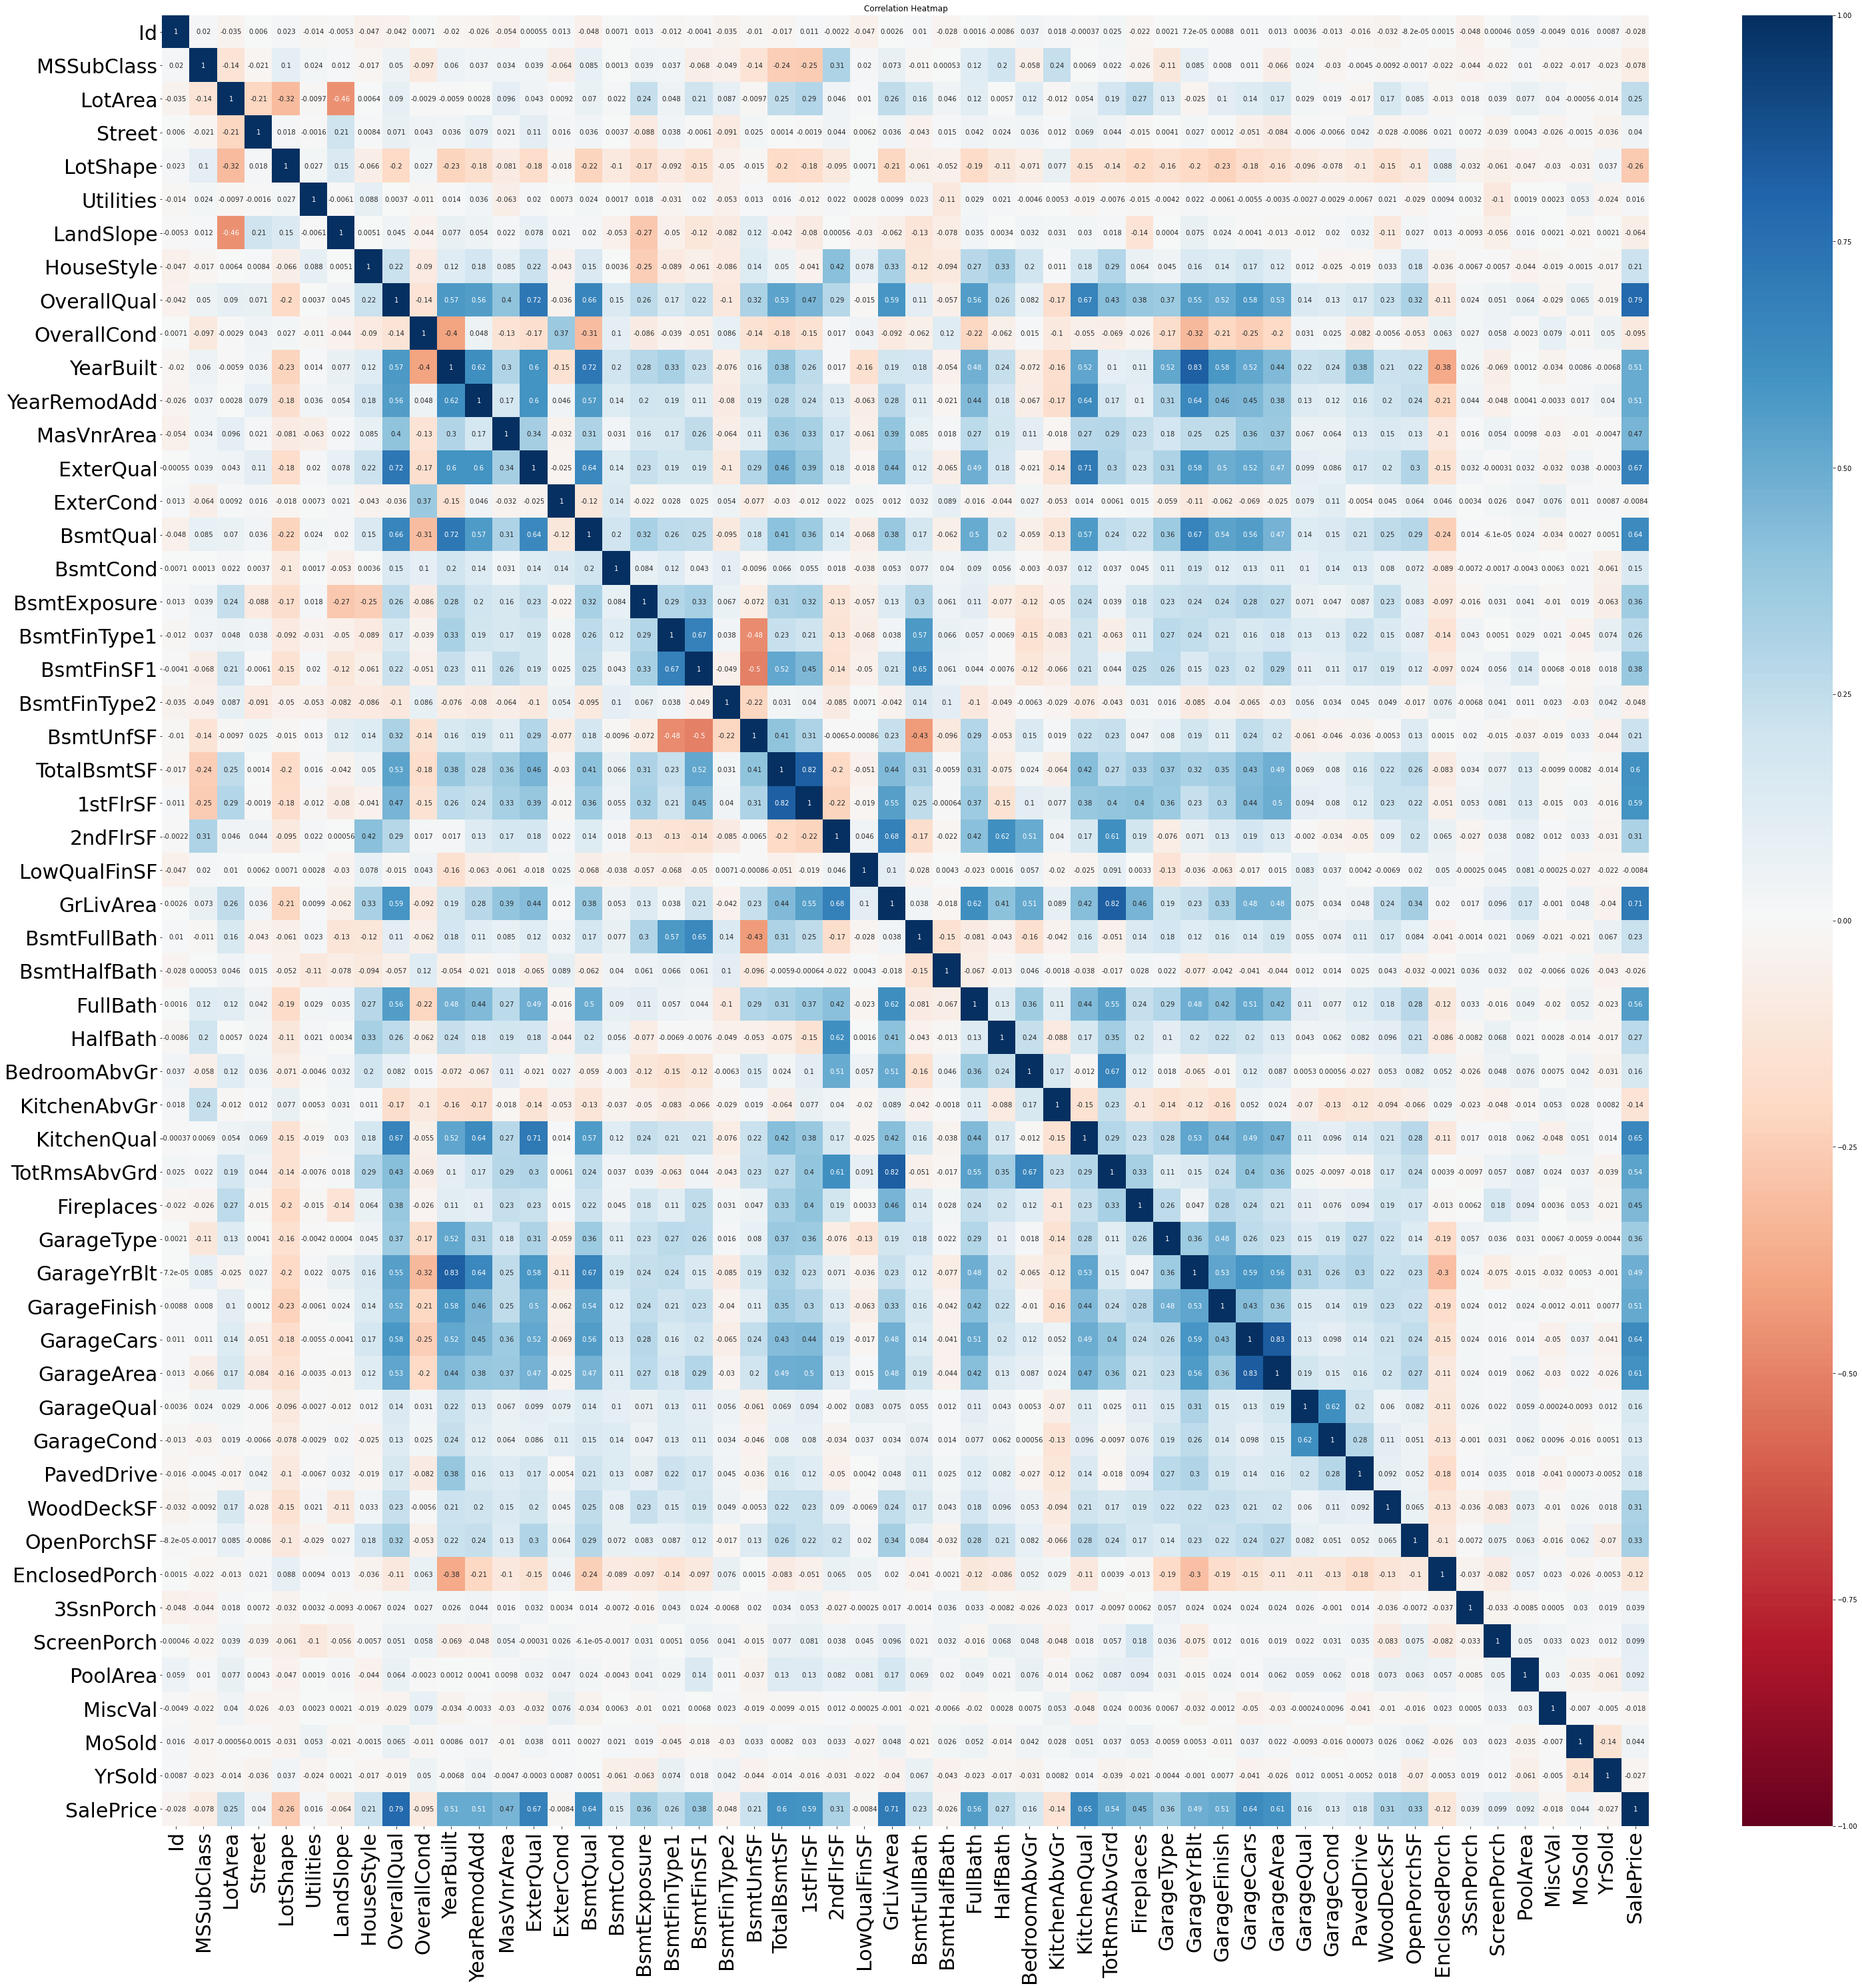

In [ ]:
plt.figure(figsize = (50, 50))
s = sns.heatmap(data_train3.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 30)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 30)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#lets go for lineal, polynomial, logistic, knn, random forest, XGbosst... so 6 branches after scaling, spliting.. check UM C3W2 for multiple hyperparameters

In [ ]:
data_train3.columns


Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'Utilities',
       'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
#dropping some more variables than in principle do not have a certain impact on price as per the correlation coefficients above
data_train4= data_train3.drop(['Id', 'MSSubClass','Street','Utilities','ExterCond','GarageYrBlt','3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], axis=1)

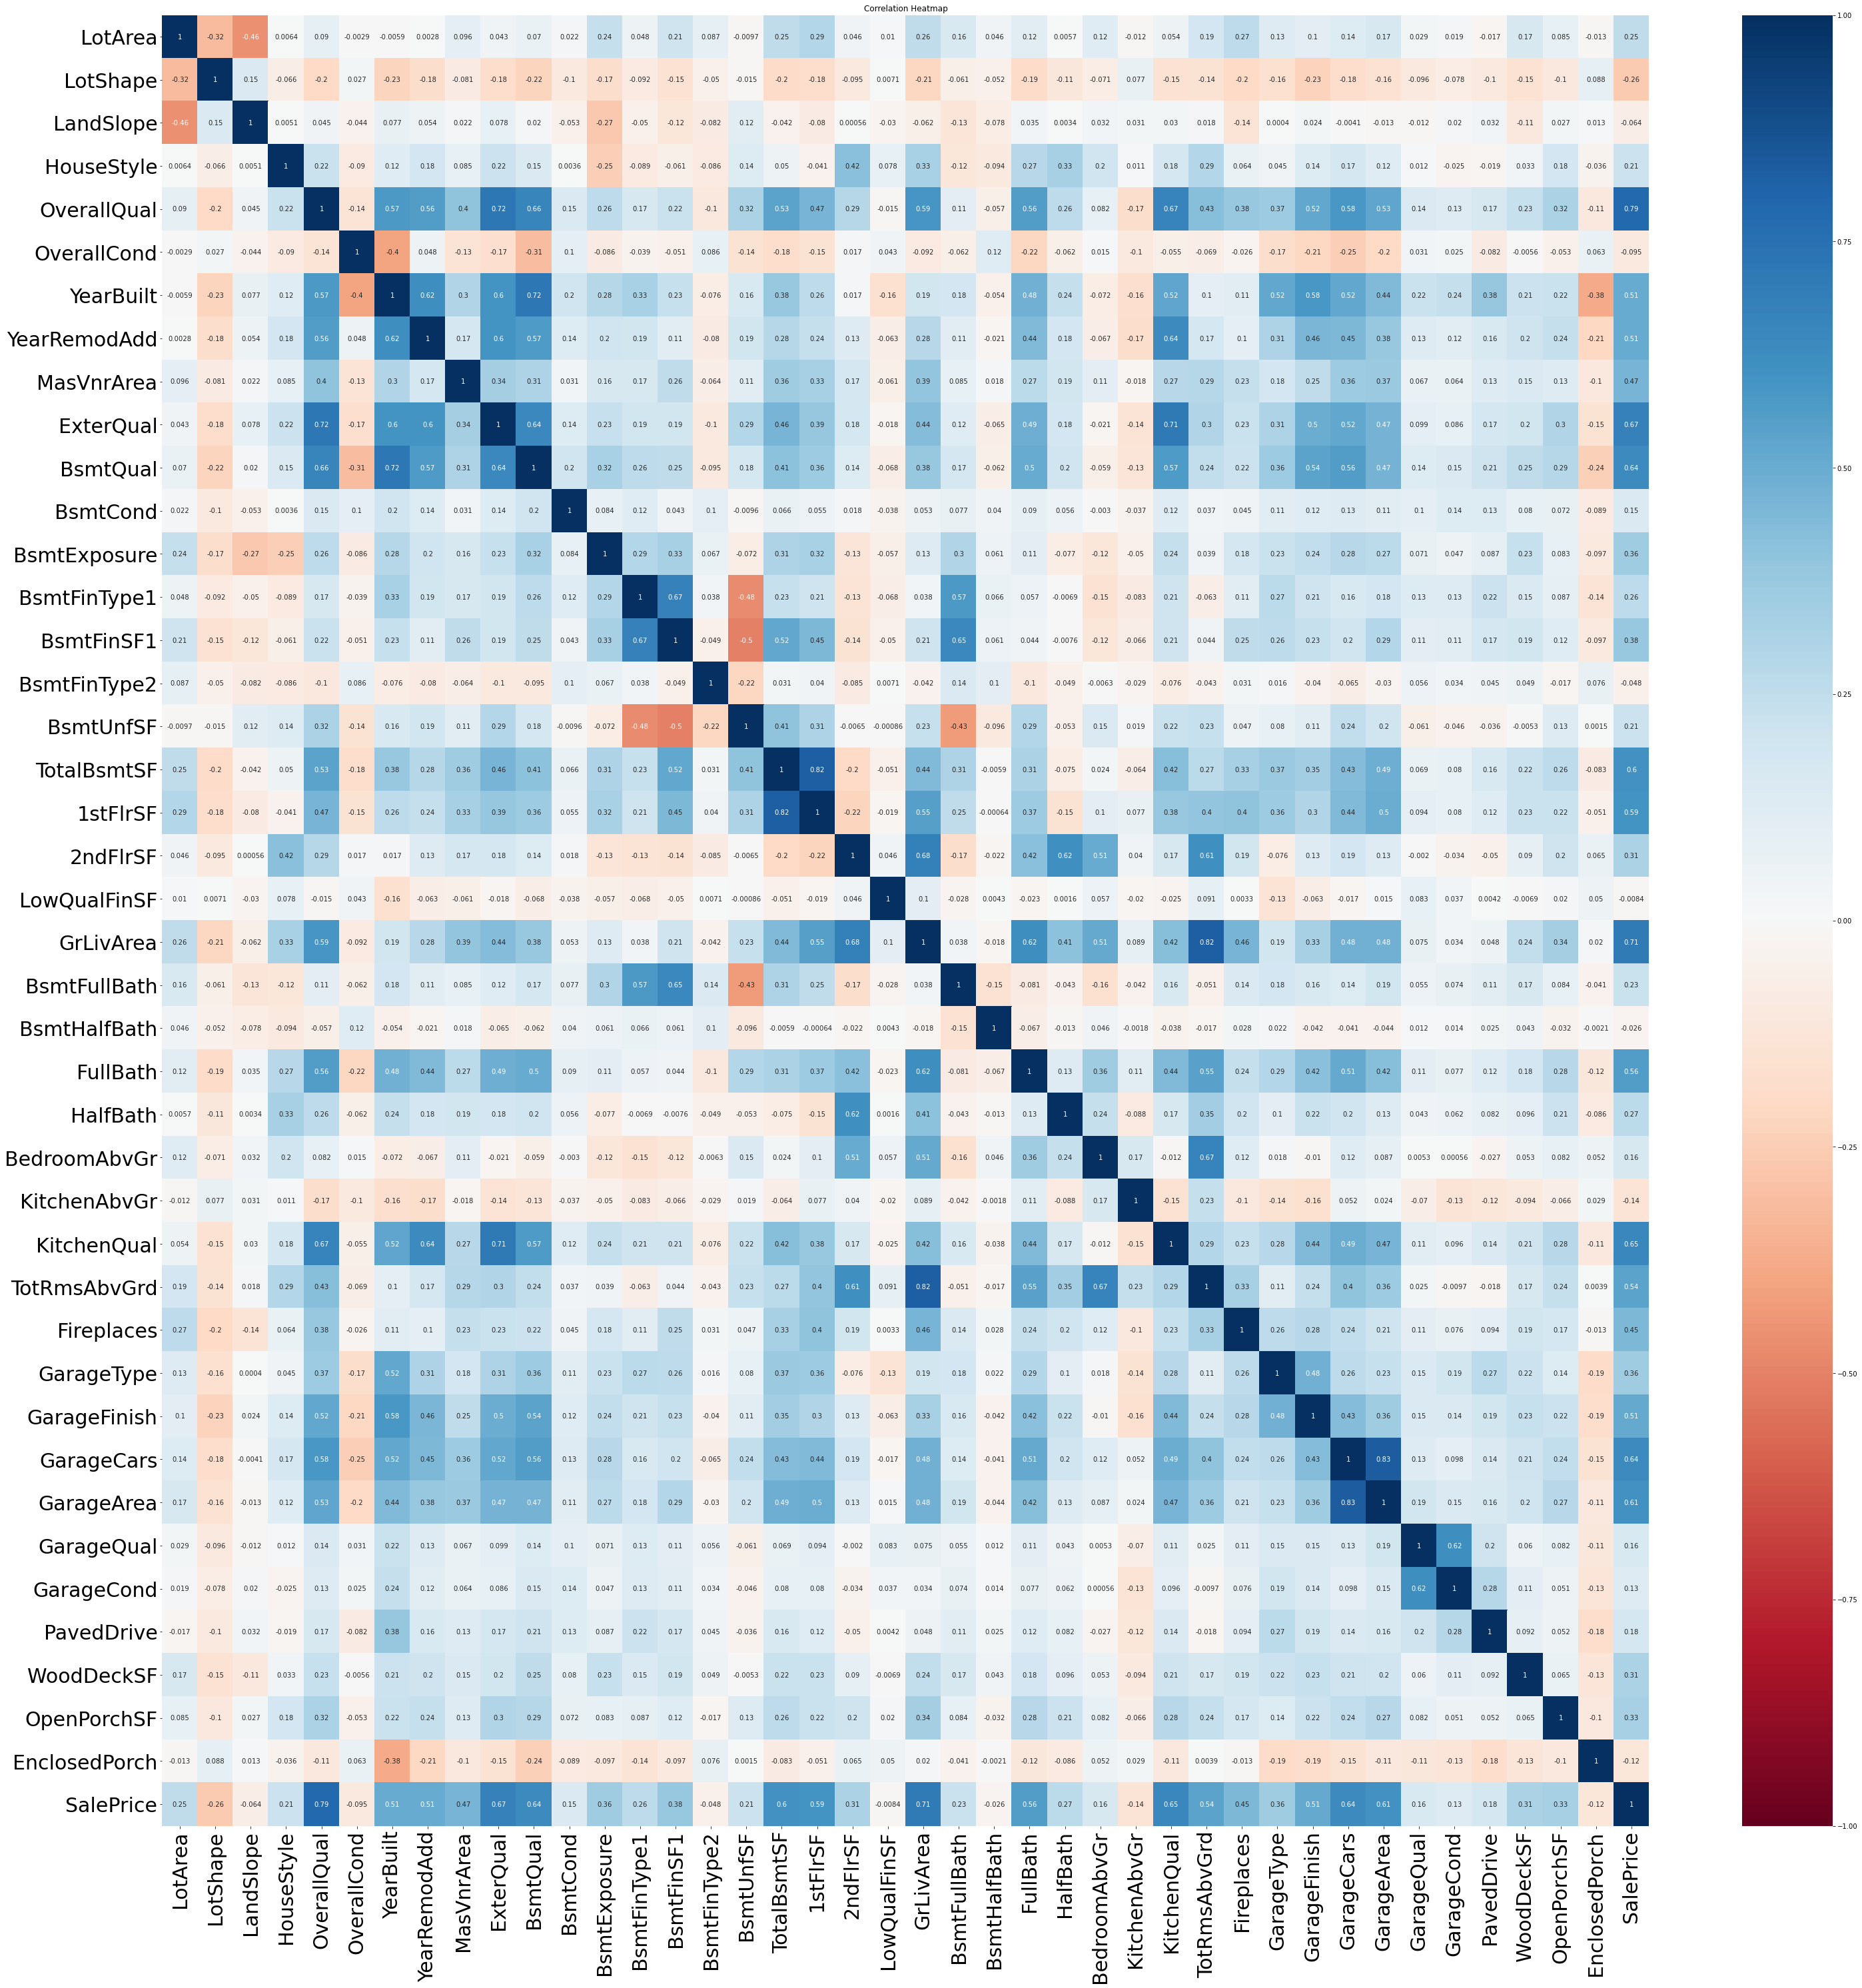

In [ ]:
plt.figure(figsize = (50, 50))
s = sns.heatmap(data_train4.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 30)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 30)
plt.title('Correlation Heatmap')
plt.show()

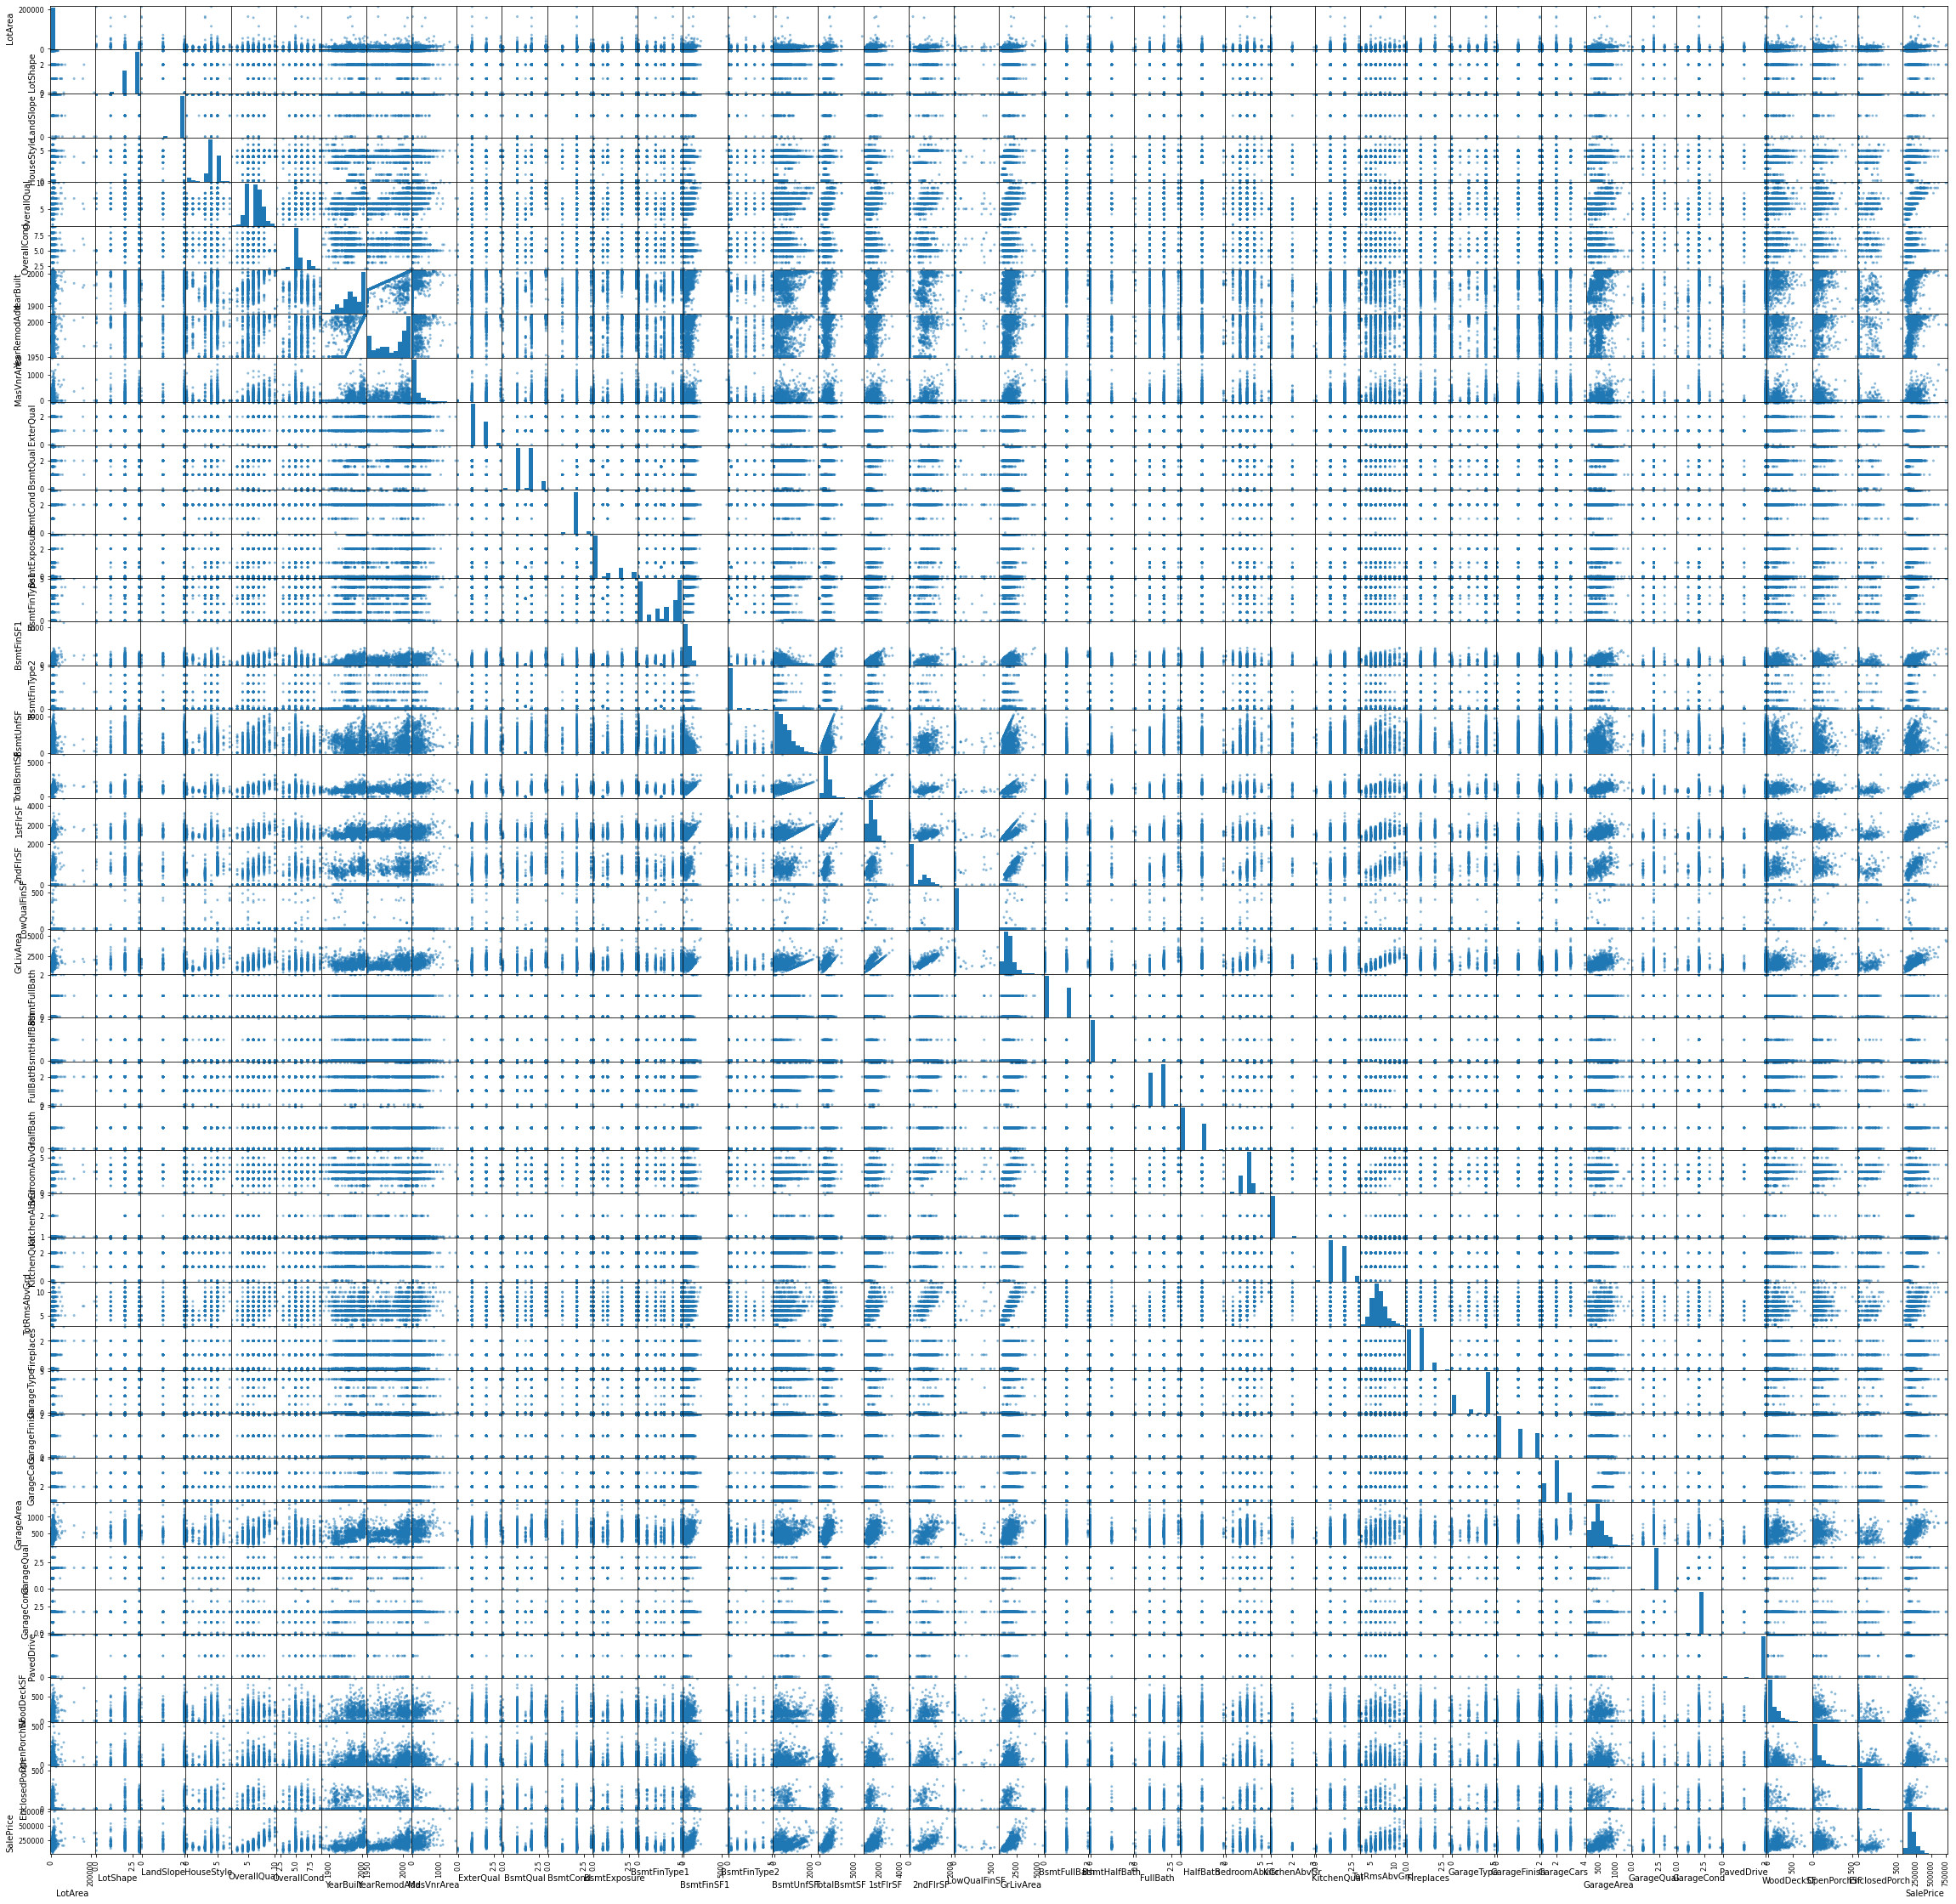

In [56]:
pd.plotting.scatter_matrix(data_train4, figsize=(40,40));

In [57]:
#dropping some more variables whose distribution is not good for the exercise as per the above chart
data_train5= data_train4.drop(['LotArea', 'CentralAir','LandSlope', 'BsmtCond','BsmtHalfBath', 'KitchenAbvGr','GarageQual', 'GarageCond', 'PavedDrive' ], axis=1)

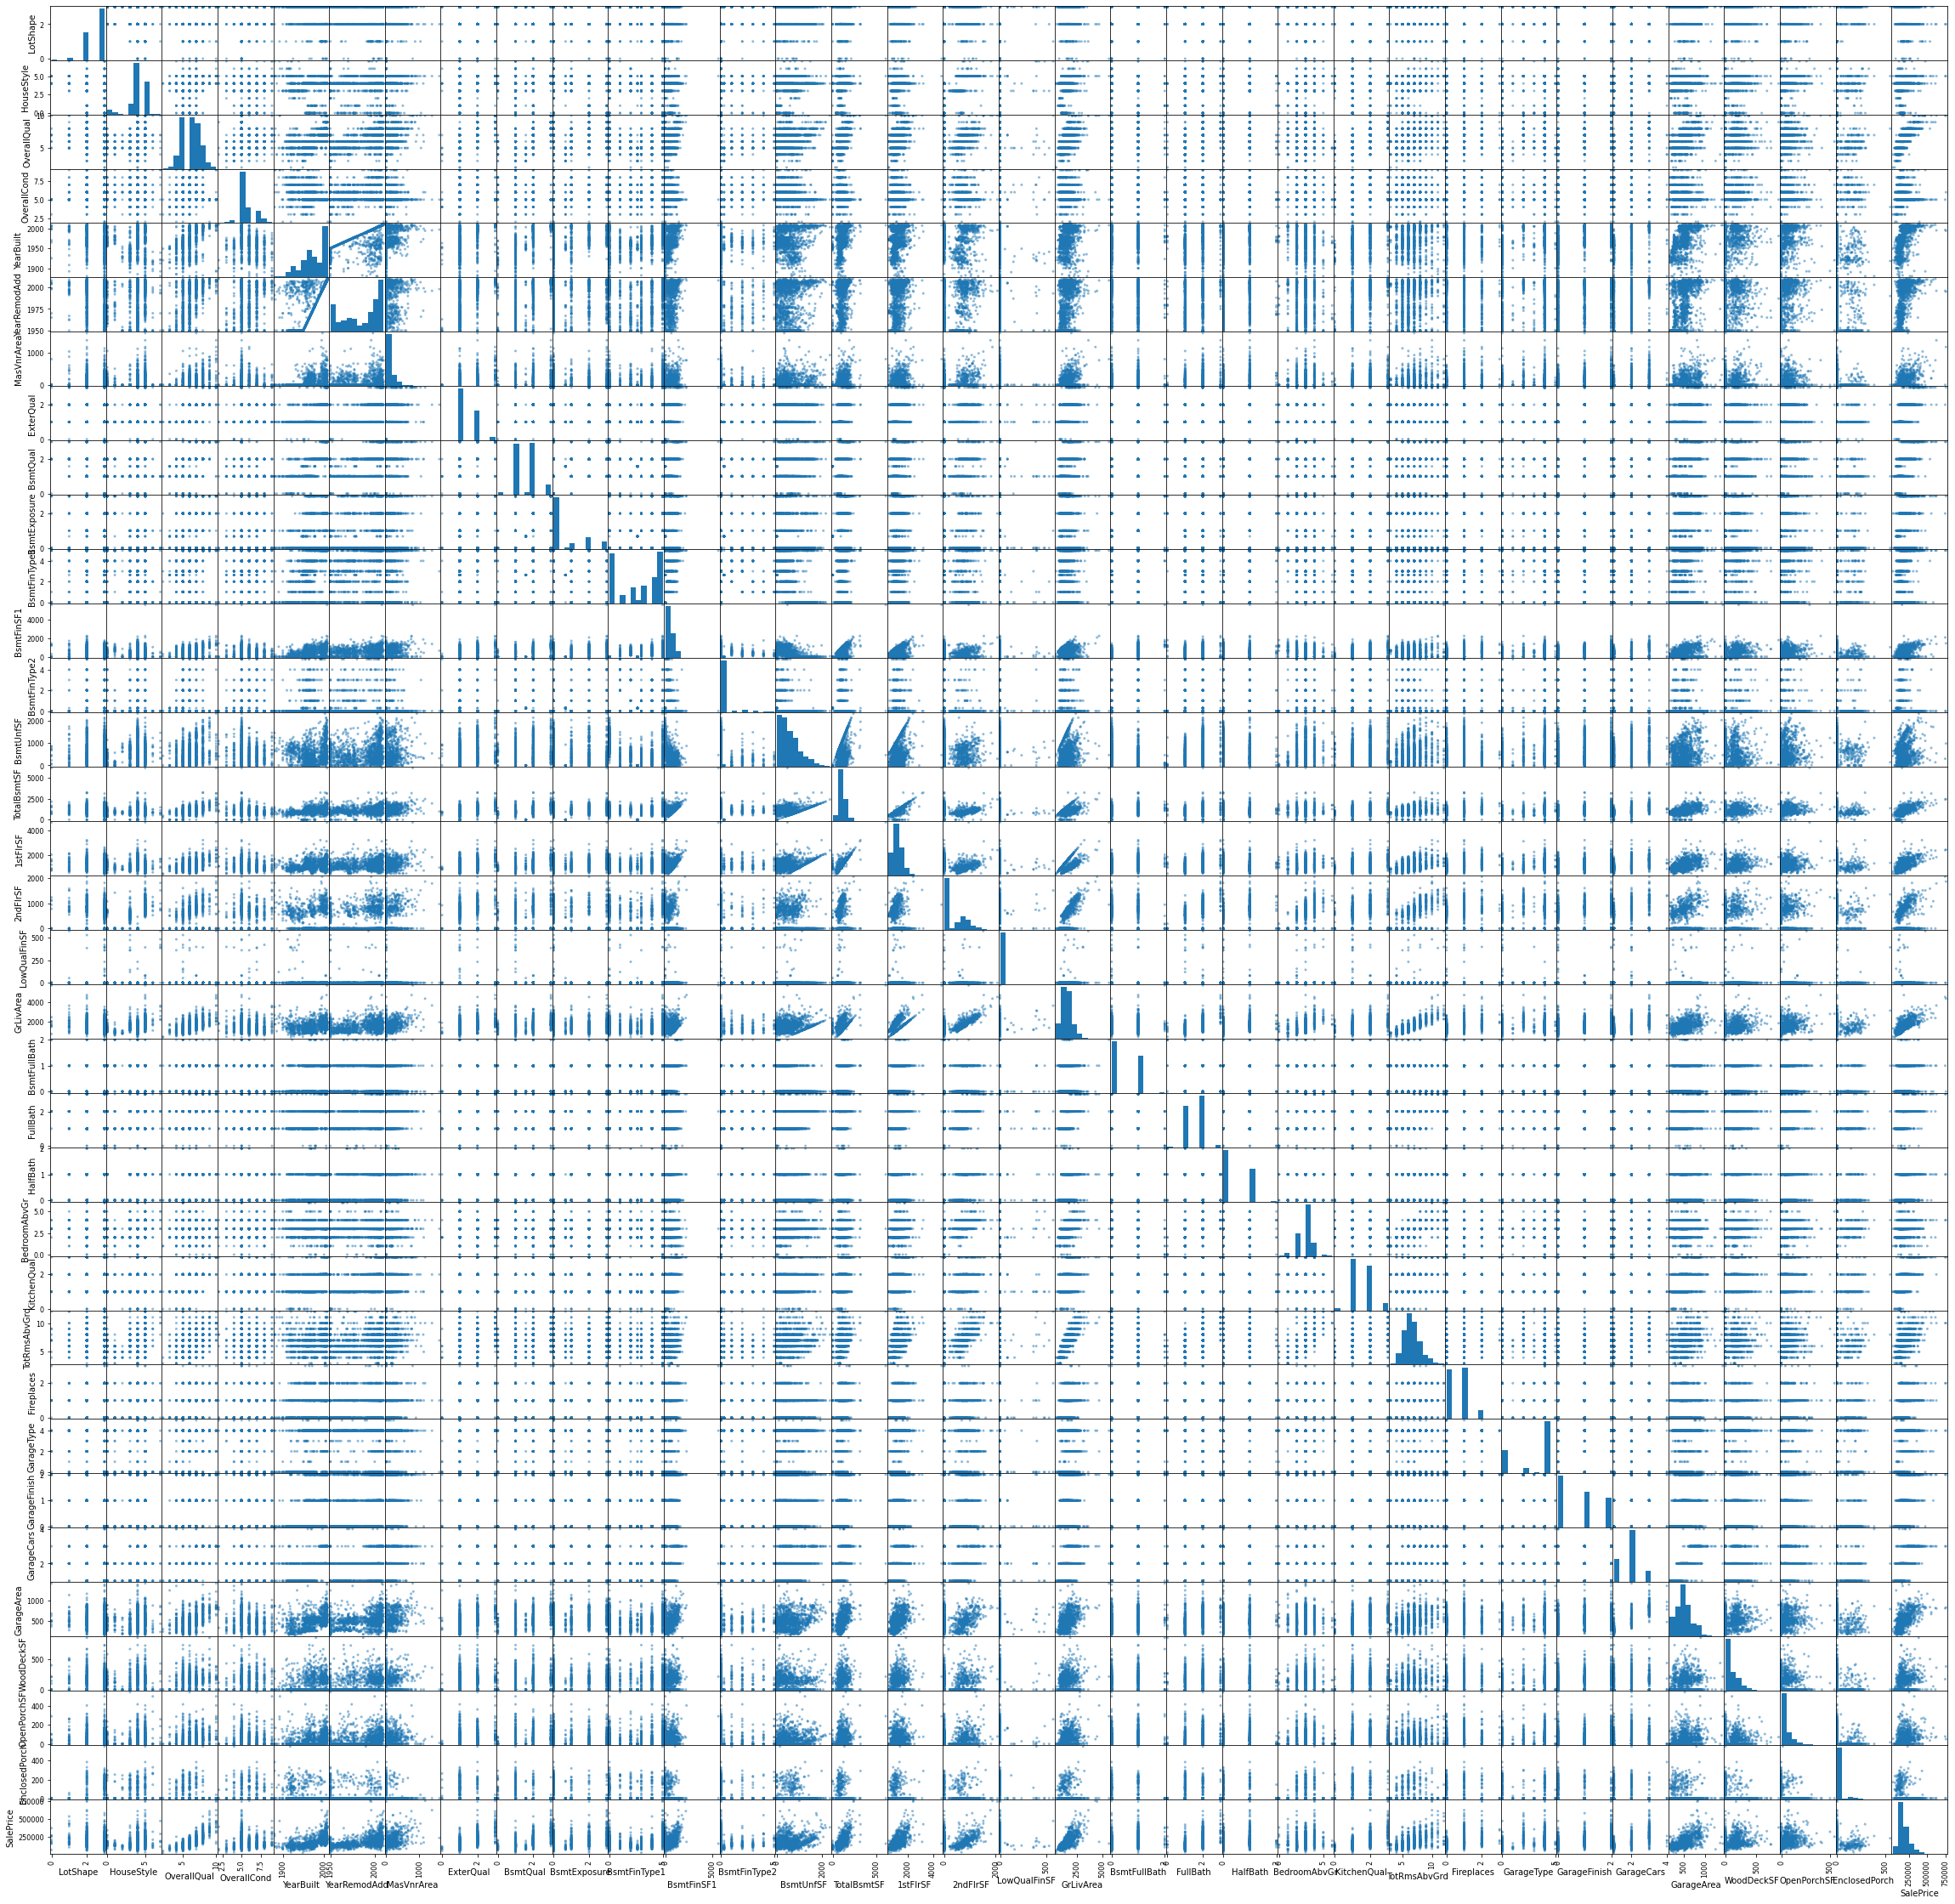

In [58]:
pd.plotting.scatter_matrix(data_train5, figsize=(40,40));

In [59]:
data_train5.shape

(1379, 34)

In [60]:
data_train5.head(2)

LotShape  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         3           5            7            5       2003          2003   
1         3           4            6            8       1976          1976   

   MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0       196.0          2       2.0           0.0           5.0         706   
1         0.0          1       2.0           3.0           4.0         978   

   BsmtFinType2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0.0        150          856       856       854             0   
1           0.0        284         1262      1262         0             0   

   GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
0       1710             1         2         1             3            2   
1       1262             0         2         0             3            1   

   TotRmsAbvGrd  Fireplaces  GarageType  GarageFinish  GarageCars  GarageArea  \
0             8           0         4.0           1.0           2         548   
1             6           1         4.0           1.0           2         460   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  SalePrice  
0           0           61              0     208500  
1         298            0              0     181500

In [61]:
#DATA SPLIT

In [62]:
data_train5.shape

(1379, 34)

In [63]:
X = data_train5.iloc[:, :-1].values
y = data_train5.iloc[:, -1].values

In [64]:
X.shape

(1379, 33)

In [65]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [66]:
#feature scaling

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [68]:
X_train.shape

(1034, 33)

In [69]:
X_test.shape

(345, 33)

In [70]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors =3).fit(X_train, y_train)

In [97]:
# Running KNN for various values of n_neighbors and storing results
from sklearn.metrics import r2_score
knn_r_acc = []
for i in range(1,17,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_score = knn.score(X_test,y_test)
    train_score = knn.score(X_train,y_train)
    y_pred = knn.predict(X_test)

   
    r2_score_knn = r2_score(y_test, y_pred).round(2)

    MSLE=np.sqrt(mean_squared_log_error( y_test, y_pred ))

    knn_r_acc.append((i, test_score ,train_score, r2_score_knn, MSLE))
df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score','R2','MSLE'])
print(df)

     K  Test Score  Train Score    R2      MSLE
0    1    0.748376     0.999992  0.75  0.197827
1    2    0.801562     0.925420  0.80  0.170469
2    3    0.804721     0.894129  0.80  0.166209
3    4    0.805428     0.870212  0.81  0.163334
4    5    0.812075     0.858989  0.81  0.161149
5    6    0.811863     0.846297  0.81  0.159215
6    7    0.831731     0.835161  0.83  0.155441
7    8    0.824717     0.826479  0.82  0.155140
8    9    0.823904     0.819254  0.82  0.155676
9   10    0.827150     0.816520  0.83  0.154538
10  11    0.822947     0.812622  0.82  0.156125
11  12    0.818042     0.811387  0.82  0.156367
12  13    0.820127     0.807333  0.82  0.156134
13  14    0.821134     0.805109  0.82  0.156595
14  15    0.822343     0.804415  0.82  0.156187
15  16    0.821553     0.799933  0.82  0.156922


No handles with labels found to put in legend.


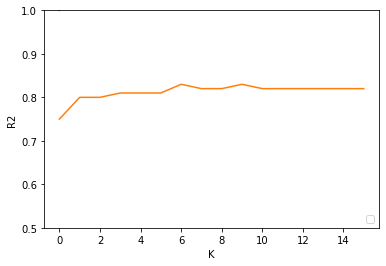

In [95]:
plt.plot(df['K'])
plt.plot(df['R2'] )
plt.xlabel('K')
plt.ylabel('R2')b
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [96]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_test, y_pred ))

0.1569216650028646